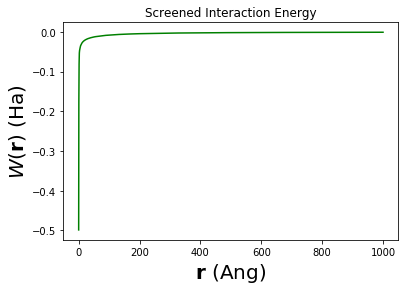

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from gpaw.response.qeh import Heterostructure
from gpaw.response.qeh import interpolate_building_blocks
%matplotlib inline

#interpolate_building_blocks(BBfiles=['MoS2'], BBmotherfile='WSe2')


thick_MoS2 = 6.21
#thick_WSe2 = 6.718

#d_MoS2_WSe2 = (thick_MoS2 + thick_WSe2) / 2
#inter_mass = 0.244


HS = Heterostructure(structure=['H-MoS2'],
                     d=thick_MoS2,
                     include_dipole=True,
                     #qmax=None,
                     wmax=0,
                     d0=thick_MoS2,
                     #include_dipole=False
                    )

hl_array = np.zeros(2)  # the factor 2 accounts for
el_array = np.zeros(2)

hl_array[0] = 1
el_array[0] = 1

r, W_r = HS.get_exciton_screened_potential_r(
    r_array=np.linspace(1e-1, 1000, 10000),
    e_distr=el_array,
    h_distr=hl_array,
    )

np.save('MoS2_alone_W', W_r)  
np.save('MoS2_alone_r', r) 

plt.plot(r, W_r, '-g')
plt.title(r'Screened Interaction Energy')
plt.xlabel(r'${\bf r}$ (Ang)', fontsize=20)
plt.ylabel(r'$W({\bf r})$ (Ha)', fontsize=20)
#plt.savefig('W_r_mos2.svg')
plt.show()


In [2]:
ee, ev = HS.get_exciton_binding_energies(eff_mass=0.277,  # exciton eff_mass
                                             e_distr=el_array,
                                             h_distr=hl_array)

print('The interlayer exciton binding energy is:', -ee[0].real)

The interlayer exciton binding energy is: 0.5971132042958553


In [15]:
from scipy import integrate
import numpy as np
#import sympy as sym
import math as m
from scipy.interpolate import interp1d
from scipy import integrate
import matplotlib.pyplot as plt
#@matplotlib inline

#r=np.load('r_for_W.npy')
#W11_r=np.load('W_r_mos2.npy')

r=np.load('MoS2_alone_r.npy')
W11_r=np.load('MoS2_alone_W.npy')

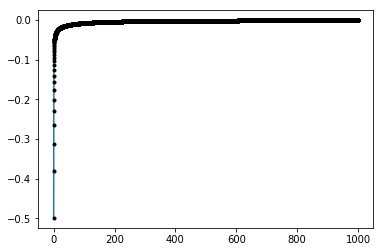

In [16]:
from scipy.integrate import quad


#квадрат волновой функции
def wavefunc(x,aa):
    return 4*np.exp(-2*x/aa)/(aa**2*2*np.pi)

W11r = interp1d(r,W11_r,kind='linear')
plt.plot(r,W11r(r))
plt.plot(r,W11_r,'k.')

def integrand11(rr,a):
    return 27.21*rr*wavefunc(rr,a)*W11r(rr)
    
def V11(a):    
    return 2*np.pi*integrate.quad(integrand11, r[0], r[-1], args=(a,), limit=200)[0]

In [17]:
from ase.units import Bohr, Hartree

m1e=0.55
m1h=0.56
#mu11=m1e*m1h/(m1e+m1h)
eff_mass=0.277

### K11 in eV
def K11(a):
#     ainm=a*1.e-10 ### A to m
#     return JtoeV*hbar**2/(2*mu11*ainm**2)
    return Hartree/(2*eff_mass*a**2)


In [18]:
#a=np.linspace(1,100,50)
#H11=np.zeros(50)

#for i in range(50):
 #   H11[i]=K11(a[i])+V11(a[i])

#plt.plot(a,H11)

@np.vectorize
def gs(a):
    H11=K11(a)+V11(a)
    return H11

In [19]:
#min(H11)

from scipy import optimize

value= optimize.minimize(gs, [2])

value

/home/natasha/anaconda3/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:16: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  app.launch_new_instance()


      fun: -0.6057482857153326
 hess_inv: array([[396.94483087]])
      jac: array([-2.68220901e-07])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 15
     njev: 16
   status: 0
  success: True
        x: array([15.48548205])